#### Assignment
* Create a Jupyter Notebook that contains your explanations and analyses.
* Start the notebook with a clear description of the type of analysis you are going to perform.
* The conceptual contents of the Notebook should be roughly similar to a normal written report of 10-20 pages.
* Some (minimum) properties of the Notebook and your analyses on which we will grade:
    * Required: Combine different data from multiple sources in your analyses.
    * Required: Use multiple types of __visualizations__ of your results.
    * Required: Make sure your Notebook does not generate errors!
    * Required: You should use Python to answer your __research questions__. Your code should read, clean and format, process and visualize the data. There should be at least some non-trivial processing involved.
    * Whenever possible, make your Notebook read the data directly from the web. This way, your notebook will always use the most up-to-date data available. If not, __document__ carefully where the data was collected what to do when you want to use more up-to-date data.
    * Demonstrate your skills in Python by using typical Python constructs and using the appropriate data structures (lists, dictionaries, tuples, arrays, dataframes, series, recursion, etc.)
    * Write clear, understandable code:
        * Document your code! Put comments when necessary.
        * Use sensible variable names.
        * Break up your code into parts. Use (fruitful) __functions__.
    * Try to think of __reusability__ of your code. How easy would it be to use your same code if we want to try to do a small variations of your analysis? Can we easily adapt/play around with your code?
    * How difficult were your analyses?
* Make your Notebook self-explanatory. So, it should contain text __(with references)__ as well as your actual analysis code and results.
* If you want to use other libraries for your analyses or visualizations, feel free to do so. However, only use free available and well-known libraries. The ones that come standard with Anaconda are fine. If you want to use something else, that you first need to install, check with us first.
* Create a zip archive and upload it on Brightspace.

#### Example
Here are some example questions you might ask to start the analysis. Please note that this is just an example and that you are expected to come up with your own questions and analyses.
* The EU has the following goal in the Paris agreement: "At least a 40% domestic reduction in greenhouse gases by 2030 compared to 1990 levels.” How is the EU doing at the moment? If they don’t change policy (i.e extrapolation of current trends) where will they end up? [source]
* Can you classify in good/neutral/bad countries?
* What is the trend per continent with respect to gas emissions? How do countries within the same continent behave? Is it fair to make statements over whole continents?
* Where do you find the highest increase in temperatures compared to 1960?
* Suppose that each country has a % growth or reduction of CO2, where do we end up?
* What are the countries with most gas emissions? How does that change when you normalize by their size / population?
* What is the country with the best trend in renewable energy over the last 10 years?

# Can we make a change on climate change?
#### EPA1333 Final Assignment

#### Angga Irawan (4516974), Priadi Teguh Wibowo



### Introduction

Global temperature rise, warming oceans, shrinking ice sheets, sea level rise are some evidences that the climate is changing. The suspected main cause of this phenomena is the greenhouse effect generated by the certain type of gases such as, Nitrous oxide, Carbon dioxide, and Methane.    

The long term consequences of this phenomena will affect the future condition of the Earth. Temperature will continue to increase, changes of precipitation patterns, also potentially more heat waves and hurricanes.  

In this project assignment, we are going to try to inspect a dataset mainly from world bank data, take a closer look to the data and build a model of the climate change phenomena to foresee what is going to happen in the near future if we do not change the current trend or even stay at our current state of environment system.

We will restrict our investigation to one of the most prominent evidence of the climate change: Global Temperature. Global surface temperature anomaly to be more precise. It refers to the deviation of the observed temperature from the reference or long term average. This observation can be used as diagnostic quantity of global-scale climate [1].

We will analyse the dataset provided, perform a preliminary investigation to get a better understanding of the data and obtain the initial insight. We also will add the dataset with the information from another resources, do a selection of the appropiate information, and preprocess the data so that the data will not completely raw. 

Then, we could develop a model and perform a prediction of the future condition. Furthermore, we could explore more the parameter of the model so that we get a better explanation why the condition turn to be so.      



<dl>
The following are several research question we are going to try to answer to help our analysis keep on track.
<dd>1. This is question one.</dd>
<dd>2. This is question two.</dd>
</dl>

[1] https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php


### Data

#### Climate change indicators
The climate change data offered by World Bank contains a large set of indicators, such as for example CO2 emissions, population growth or renewable energy output. Values of these indicators are available per country and per year. You can download the data in *.csv format from https://data.worldbank.org/topic/climate-change.

Import standard library to prepare the reading and loading process of the data.

In [1]:
# import standard library
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Load the world bank data as a dataframe.

In [2]:
# load world bank data
# skip the unneeded header
wb = pd.read_csv('world_bank/API_19_DS2_en_csv_v2.csv', sep=',', header=0, skiprows=3) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb = wb.drop(wb.columns[[-1]], 1)

# display the head of dataframe
wb.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929


The world bank data consists of data for 57 years (1960-2016) of 264 countries with 80 indicators for each country. These data could be utilized as the raw features of our model. 

Read the additional csv file which contains the metadata of the counries on the main world bank data.

In [3]:
#load country metadata
wb_meta_country = pd.read_csv('world_bank/Metadata_Country_API_19_DS2_en_csv_v2.csv', sep=',', header=0) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb_meta_country = wb_meta_country.drop(wb_meta_country.columns[[-1]], 1)

# display the head of dataframe
wb_meta_country.head()


,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra


We also have to include the another csv file containing the metadata of the indicator on the main world bank data. 

In [4]:
#load indicator metadata
wb_meta_indi = pd.read_csv('world_bank/Metadata_Indicator_API_19_DS2_en_csv_v2.csv', sep=',', header=0) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb_meta_indi = wb_meta_indi.drop(wb_meta_indi.columns[[-1]], 1)

# display the head of dataframe
wb_meta_indi.head()


,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
0,SP.URB.TOTL.IN.ZS,Urban population (% of total),Urban population refers to people living in ur...,The United Nations Population Divisions World ...
1,SP.URB.TOTL,Urban population,Urban population refers to people living in ur...,World Bank Staff estimates based on United Nat...
2,SP.URB.GROW,Urban population growth (annual %),Urban population refers to people living in ur...,World Bank Staff estimates based on United Nat...
3,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...
4,SP.POP.GROW,Population growth (annual %),Annual population growth rate for year t is th...,Derived from total population. Population sour...


#### Climate data API
The Climate Data API provides additional data beside the world bank data such as, temperature, precipitation and basin level data. It can be directly accessed from Python using requests. The detail is available here: https://datahelpdesk.worldbank.org/knowledgebase/articles/902061-climate-data-api

Below is an example of how to access yearly temperature historical data per country from Python. ISO aplha3 code to select a country: https://unstats.un.org/unsd/methodology/m49/. Change 'tas' with 'pr' to obtain the precipitation of a country instead.


In [5]:
import requests
indonesia = requests.get('http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/IDN')
idn = indonesia.json()
idn[:5]

[{'data': 25.897385, 'year': 1901},
 {'data': 25.891254, 'year': 1902},
 {'data': 25.89029, 'year': 1903},
 {'data': 25.81223, 'year': 1904},
 {'data': 25.89114, 'year': 1905}]

# Additional Data

We need additional data from other resources to assist the previous obtained data as the additional feature, a potential label for the classification, or a ground truth for the prediction.

## $CO_{2}$ Levels

In [6]:
df_co2 = pd.read_csv('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt', 
                     delim_whitespace=True, 
                     engine='python',
                     skiprows=72,
                     names = ['year', 'months','decimal date', 'average', 'interpolated', 'trend', '#days']
                    )

In [7]:
df_co2.head()

,year,months,decimal date,average,interpolated,trend,#days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1


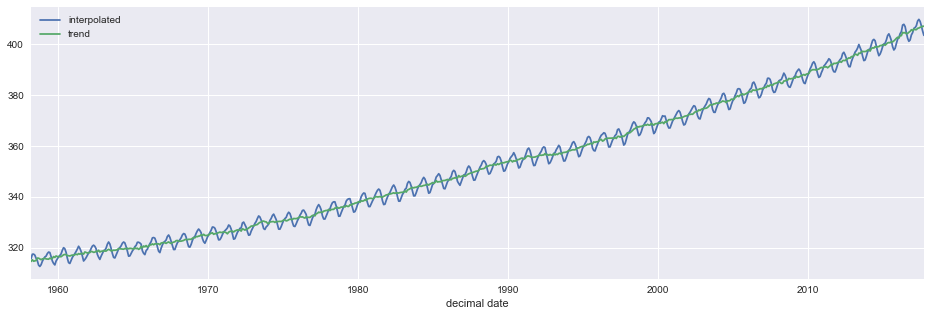

In [8]:
values = ['interpolated', 'trend']
df_co2[values].plot(x = df_co2['decimal date'],figsize=(16,5))

## Global Temperature Anomaly

In [9]:
df_tempe = pd.read_csv(
    'https://climate.nasa.gov/system/internal_resources/details/original/647_Global_Temperature_Data_File.txt', 
    sep="     ", 
    names=['year', 'annual mean', '5 year mean'],
    index_col = 'year',
    engine ='python')

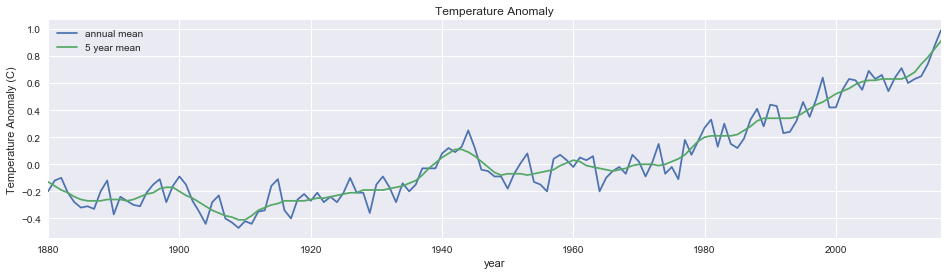

In [10]:
df_tempe.plot(figsize = (16,4))
plt.ylabel('Temperature Anomaly (C)')
plt.title('Temperature Anomaly')

In [11]:
# slice the range of year, make suitable with the world bank data (provided since 1960)
df_tempe.index.name = None
df_tempe_since_1960 = df_tempe[80:]
df_tempe_since_1960.head()

,annual mean,5 year mean
1960,-0.02,0.03
1961,0.05,0.02
1962,0.03,-0.01
1963,0.06,-0.02
1964,-0.20,-0.03


## Climate Change Performance Index

In [168]:
# load label Climate Change Performance Index
# the data were extracted from https://germanwatch.org/en/download/16484.pdf
country_class_y = pd.read_csv('world_bank/CCPI_2017.csv', sep=',', header=0) 
country_class_y.head()

# rename the CCPI column to Country Name, so it could be 'merge' on this column name
country_class_y.columns = ['Country Name', 'Label']
label_int = country_class_y['Label'].map({'Good':2, 'Neutral':1, 'Bad':0})
country_class_y.head()

,Country Name,Label
0,France,Good
1,Sweden,Good
2,United Kingdom,Good
3,Cyprus,Good
4,Luxembourg,Good


# Data Cleaning and Preprocessing

Before jump in to the analysis of the data, we need to clean and preprocess the data first. 

## World Bank Data Interpolation

In [169]:
# create column of years of the world bank data
years_column = wb.columns.values[range(4,61)]
years_column

array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'], dtype=object)

In [170]:
# copy the content of the dataframe (to avoid copying the reference) for the interpolation
wb_prep = pd.DataFrame()
wb_prep = wb[years_column]
# reset the column (year) to integer
wb_prep.columns = range(0,57)
# display the dataframe
wb_prep.head(8)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.670000,50.654000,50.639000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,29253.000000,29416.000000,29575.000000,29738.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,0.586271,0.555661,0.539067,0.549628,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,57715.000000,58055.000000,58386.000000,58726.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.900000,97.800000,97.800000,97.700000,97.700000,97.700000,97.700000,97.700000,97.700000,NaN


In [171]:
# interpolate the data in row direction also in both direction within range limit
wb_interpolated = wb_prep.interpolate(method='linear',limit_direction='both',limit=56,axis=1)

In [172]:
# show the interpolation results
wb_interpolated.head(8)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.670000,50.654000,50.639000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,29253.000000,29416.000000,29575.000000,29738.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,0.586271,0.555661,0.539067,0.549628,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,57715.000000,58055.000000,58386.000000,58726.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,...,97.900000,97.800000,97.800000,97.700000,97.700000,97.700000,97.700000,97.700000,97.700000,97.700000


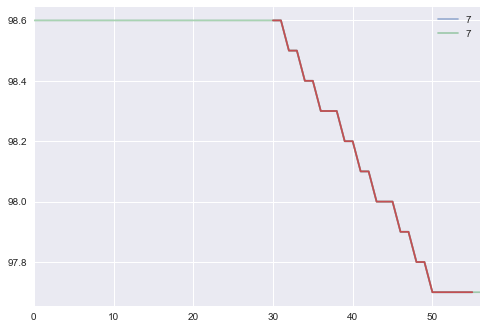

In [173]:
df_compare_interpolation = pd.concat([wb_prep.iloc[7], wb_interpolated.iloc[7]], axis = 1)
df_compare_interpolation.plot(alpha = 0.5)
wb_prep.iloc[7].plot()

In [174]:
# create a new dataframe to avoid overwriting the original dataframe
wb_inter = pd.DataFrame()
wb_inter = wb[wb.columns.values]

# replace wb_inter annual value with the interpolated one
wb_inter[list(wb.columns.values[range(4,61)])] = wb_interpolated[list(range(0,57))]

# now we have interpolated world bank data
wb_inter.head(8)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929
5,Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aruba,ABW,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Aruba,ABW,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,...,97.900000,97.800000,97.800000,97.700000,97.700000,97.700000,97.700000,97.700000,97.700000,97.700000


## Filter the world bank data with CCPI countries

### CCPI results

New dataframe which contains only the data from countries mention in CCPI document.

In [175]:
# create a df of countries from CCPI results countries
df_ccpi = pd.DataFrame()
for country in country_class_y['Country Name']:
    # filter the CCPI countries
    
    # not interpolated
    # df1 = wb[wb['Country Name'] == country]
    
    # take it from the interpolated one
    df1 = wb_inter[wb_inter['Country Name'] == country]

    # append to the df
    df_ccpi = pd.concat( [df_ccpi,df1], ignore_index=True, axis=0)
    
df_ccpi[:8]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,France,FRA,Urban population (% of total),SP.URB.TOTL.IN.ZS,6.188000e+01,6.260700e+01,6.348900e+01,6.470200e+01,6.589800e+01,6.707100e+01,...,7.762100e+01,7.786400e+01,7.810600e+01,7.834500e+01,7.858400e+01,7.882000e+01,7.905500e+01,7.928900e+01,7.952000e+01,7.975000e+01
1,France,FRA,Urban population,SP.URB.TOTL,2.896865e+07,2.970374e+07,3.055068e+07,3.157696e+07,3.258617e+07,3.355144e+07,...,4.969004e+07,5.012494e+07,5.054008e+07,5.094580e+07,5.134897e+07,5.175305e+07,5.217517e+07,5.259394e+07,5.297946e+07,5.334965e+07
2,France,FRA,Urban population growth (annual %),SP.URB.GROW,2.424503e+00,2.505858e+00,2.811428e+00,3.304057e+00,3.146026e+00,2.919203e+00,...,9.335545e-01,8.714278e-01,8.248035e-01,7.995637e-01,7.882418e-01,7.838471e-01,8.123421e-01,7.994288e-01,7.303273e-01,6.963089e-01
3,France,FRA,"Population, total",SP.POP.TOTL,4.681424e+07,4.744475e+07,4.811965e+07,4.880368e+07,4.944940e+07,5.002377e+07,...,6.401623e+07,6.437499e+07,6.470704e+07,6.502751e+07,6.534278e+07,6.565979e+07,6.599857e+07,6.633196e+07,6.662407e+07,6.689611e+07
4,France,FRA,Population growth (annual %),SP.POP.GROW,1.229610e+00,1.337853e+00,1.412470e+00,1.411512e+00,1.314427e+00,1.154839e+00,...,6.187115e-01,5.588574e-01,5.144864e-01,4.940375e-01,4.836449e-01,4.839823e-01,5.146361e-01,5.038712e-01,4.394107e-01,4.074910e-01
5,France,FRA,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e-01,...,0.000000e+00,0.000000e+00,5.000000e-02,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,France,FRA,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,France,FRA,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,...,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01


### Saved Indicator

Check the data for each country which the entire years of a indicator are missing.

In [246]:
import operator

# saved indicator
list_deleted_indi = []
list_tuple_country_del_indi = []
for c, i in enumerate(range(0,4480,80)):
    # print(c, df_ccpi['Country Name'][i],df_ccpi[i:i+80].isnull().any(axis=1).sum())
    list_tuple_country_del_indi.append((df_ccpi['Country Name'][i], df_ccpi[i:i+80].isnull().any(axis=1).sum())) 
    for i in df_ccpi[i:i+80]['Indicator Name'][df_ccpi[i:i+80].isnull().any(axis=1)]:
        # print(i)
        list_deleted_indi.append(i)    

# list_tuple_country_del_indi.sort(key=operator.itemgetter(1))
df_tuple_cdi = pd.DataFrame(list_tuple_country_del_indi, columns = ['Country Name','Number of Missing Indicator'])
df_tuple_cdi = df_tuple_cdi.set_index('Country Name')
# df_tuple_cdi.plot(kind = 'bar', figsize=(16,4))


In [146]:
from bokeh.io import output_notebook
from bokeh.charts import Bar, show

output_notebook()
NA_per_country = Bar(df_tuple_cdi, 'Country Name', values='Number of Missing Indicator', 
        title="Number of Missing Indicator for Each Country",
        plot_width=900, plot_height=450, legend=False)
show(NA_per_country)

Loading BokehJS ...

In [144]:
from collections import Counter
deleted_indi_counts = Counter(list_deleted_indi)
df_dic = pd.DataFrame.from_dict(deleted_indi_counts, orient='index')
df_dic.columns = ['Number of Countries']

p = Bar(df_dic, values='Number of Countries', 
        title="Number of Countries which Missing the Indicator",
        plot_width=900, plot_height=900, legend=False)
show(p)


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['Age'],df['Sales']) #You can also add more variables here to represent color and size.
plt.show()

Filter the data frame so it only consists of the indicators which are complete for the entire year (1960-2016).

In [20]:
len(set(list_deleted_indi))

24

In [176]:
df_ccpi_clean = pd.DataFrame()

# initialize the flag of saved indicator
array_flag = np.ones((len(df_ccpi)), dtype=bool)

# transfom it to series
series_flag = pd.Series(data = array_flag, index=range(len(df_ccpi)))

# filter the indicator
for indi in sorted(set(list_deleted_indi)):
    series_flag = (series_flag & (df_ccpi['Indicator Name'] != indi))

# filter the df
df_ccpi_clean_reset = df_ccpi[series_flag]


As we could see from dataframe above, we do not have missing value anymore.

## Feature Selection and Feature Engineering

### Averaging and Summing the Features

In [177]:
df_feature_select = pd.read_csv('world_bank/feature_selection.csv',sep=',', header=0) 

In [178]:
df_feature_select.head()
# df_feature_select[(df_feature_select['Global'] == 'average')]

,Indicator Name,Local,Global
0,Urban population (% of total),remove,remove
1,Urban population,OK,sum
2,Urban population growth (annual %),OK,average
3,"Population, total",OK,sum
4,Population growth (annual %),OK,average


In [179]:
df_ccpi_feature_label = pd.merge(df_ccpi_clean_reset, df_feature_select.drop(['Local'], axis = 1), 
                                 on = 'Indicator Name', how="inner")

print('Dataframe shape:', df_ccpi_feature_label.shape)
df_ccpi_feature_label.head()

Dataframe shape: (2856, 62)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Global
0,France,FRA,Urban population (% of total),SP.URB.TOTL.IN.ZS,61.880,62.607,63.489,64.702,65.898,67.071,...,77.864,78.106,78.345,78.584,78.820,79.055,79.289,79.520,79.750,remove
1,Sweden,SWE,Urban population (% of total),SP.URB.TOTL.IN.ZS,72.490,73.295,74.271,75.223,76.153,77.056,...,84.746,84.902,85.056,85.210,85.363,85.514,85.665,85.815,85.964,remove
2,United Kingdom,GBR,Urban population (% of total),SP.URB.TOTL.IN.ZS,78.444,78.374,78.237,78.099,77.960,77.821,...,80.757,81.031,81.302,81.570,81.834,82.092,82.345,82.592,82.835,remove
3,Cyprus,CYP,Urban population (% of total),SP.URB.TOTL.IN.ZS,35.628,36.175,36.674,37.176,37.681,38.188,...,67.839,67.695,67.551,67.406,67.261,67.133,67.019,66.921,66.840,remove
4,Luxembourg,LUX,Urban population (% of total),SP.URB.TOTL.IN.ZS,69.556,69.927,70.443,70.953,71.459,71.958,...,87.800,88.178,88.547,88.906,89.247,89.568,89.872,90.160,90.432,remove


In [180]:
df_ccpi_feature_label_removed = df_ccpi_feature_label [df_ccpi_feature_label['Global'] != 'remove']
print('Dataframe shape:', df_ccpi_feature_label_removed.shape)
df_ccpi_feature_label_removed.head()

Dataframe shape: (2408, 62)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Global
56,France,FRA,Urban population,SP.URB.TOTL,28968650.0,29703735.0,30550684.0,31576957.0,32586168.0,33551445.0,...,50124942.0,50540084.0,50945804.0,51348967.0,51753046.0,52175170.0,52593945.0,52979459.0,53349647.0,sum
57,Sweden,SWE,Urban population,SP.URB.TOTL,5425627.0,5511783.0,5616067.0,5720204.0,5834351.0,5959398.0,...,7813274.0,7894625.0,7976659.0,8051674.0,8126023.0,8209668.0,8306173.0,8409171.0,8513120.0,sum
58,United Kingdom,GBR,Urban population,SP.URB.TOTL,41104656.0,41381472.0,41661202.0,41900114.0,42098400.0,42294196.0,...,49913475.0,50463084.0,51030310.0,51600299.0,52128504.0,52644143.0,53205707.0,53791229.0,54370607.0,sum
59,Cyprus,CYP,Urban population,SP.URB.TOTL,204124.0,208511.0,211862.0,214845.0,218032.0,221859.0,...,733722.0,743343.0,751577.0,758206.0,763454.0,767932.0,772266.0,776943.0,782112.0,sum
60,Luxembourg,LUX,Urban population,SP.URB.TOTL,218385.0,221560.0,225946.0,229959.0,234207.0,238541.0,...,429035.0,438935.0,448892.0,460842.0,473853.0,486677.0,499975.0,513555.0,527193.0,sum


In [181]:
set_indi_sum = set(df_ccpi_feature_label_removed[df_ccpi_feature_label_removed['Global'] == 'sum']['Indicator Name'])
len(set_indi_sum)

14

In [182]:
set_indi_average = set(df_ccpi_feature_label_removed[df_ccpi_feature_label_removed['Global'] == 'average']['Indicator Name'])
len(set_indi_average)

29

In [183]:
df_ccpi_feature_processed = pd.DataFrame()

for indi in set_indi_average:
    df_indi = df_ccpi_feature_label_removed[(df_ccpi_feature_label_removed['Global'] == 'average') & (df_ccpi_feature_label_removed['Indicator Name'] == indi)]
    df_indi_ave = (df_indi.sum(axis = 0)) 
    
    df_ccpi_feature_processed[indi] = df_indi_ave[4:-1]/len(country_class_y)
    
print('Dataframe shape:',df_ccpi_feature_processed.shape)    
df_ccpi_feature_processed.head()

Dataframe shape: (57, 29)


,"Mortality rate, under-5 (per 1,000 live births)",Population growth (annual %),"Improved water source, urban (% of urban population with access)",Access to electricity (% of population),Electricity production from nuclear sources (% of total),Average precipitation in depth (mm per year),Electricity production from hydroelectric sources (% of total),Electricity production from coal sources (% of total),Nitrous oxide emissions (% change from 1990),"Annual freshwater withdrawals, total (% of internal resources)",...,CO2 emissions (kg per 2011 PPP $ of GDP),CO2 intensity (kg per kg of oil equivalent energy use),CO2 emissions (metric tons per capita),Renewable electricity output (% of total electricity output),Electricity production from oil sources (% of total),Terrestrial protected areas (% of total land area),Terrestrial and marine protected areas (% of total territorial area),Urban population growth (annual %),Arable land (% of land area),Renewable energy consumption (% of total final energy consumption)
1960,73.7929,1.71507,98.1536,95.3771,2.45016,938.714,32.9985,33.3261,-1.78695,79.458,...,0.47175,3.04315,5.66017,21.8154,23.9234,7.80804,5.15786,3.1037,23.1082,13.6539
1961,72.1464,1.51683,98.1536,95.3771,2.45809,938.714,32.8269,32.8694,-1.78695,79.458,...,0.47175,3.03726,5.70286,21.8154,24.4755,7.80804,5.15786,2.94133,23.1082,13.6539
1962,70.5768,1.51251,98.1536,95.3771,2.47409,938.714,32.0809,32.8946,-1.78695,79.458,...,0.47175,3.03768,5.84855,21.8154,25.1127,7.80804,5.15786,2.97675,23.0374,13.6539
1963,69.0786,1.49774,98.1536,95.3771,2.51196,938.714,32.2681,32.0495,-1.78695,79.458,...,0.47175,3.04045,6.02533,21.8154,25.7103,7.80804,5.15786,2.96471,22.9832,13.6539
1964,67.5839,1.48225,98.1536,95.3771,2.57813,938.714,31.0902,32.0954,-1.78695,79.458,...,0.47175,3.04117,6.23069,21.8154,26.8022,7.80804,5.15786,2.9412,22.902,13.6539


In [184]:
for indi in set_indi_sum:
    df_indi = df_ccpi_feature_label_removed[(df_ccpi_feature_label_removed['Global'] == 'sum') & (df_ccpi_feature_label_removed['Indicator Name'] == indi)]
    df_indi_sum = df_indi.sum(axis = 0)
    
    df_ccpi_feature_processed[indi] = df_indi_sum[4:-1]
    
print('Dataframe shape:',df_ccpi_feature_processed.shape)    
df_ccpi_feature_processed.head()

Dataframe shape: (57, 43)


,"Mortality rate, under-5 (per 1,000 live births)",Population growth (annual %),"Improved water source, urban (% of urban population with access)",Access to electricity (% of population),Electricity production from nuclear sources (% of total),Average precipitation in depth (mm per year),Electricity production from hydroelectric sources (% of total),Electricity production from coal sources (% of total),Nitrous oxide emissions (% change from 1990),"Annual freshwater withdrawals, total (% of internal resources)",...,CO2 emissions (kt),PFC gas emissions (thousand metric tons of CO2 equivalent),HFC gas emissions (thousand metric tons of CO2 equivalent),"Population, total",Urban population,Forest area (sq. km),"Annual freshwater withdrawals, total (billion cubic meters)","Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Agricultural land (sq. km),Total greenhouse gas emissions (kt of CO2 equivalent)
1960,73.7929,1.71507,98.1536,95.3771,2.45016,938.714,32.9985,33.3261,-1.78695,79.458,...,1.0667e+07,104428,74836.7,2.40932e+09,8.78697e+08,2.8688e+07,2338.8,1.71553e+06,3.02061e+07,2.15502e+07
1961,72.1464,1.51683,98.1536,95.3771,2.45809,938.714,32.8269,32.8694,-1.78695,79.458,...,1.05744e+07,104428,74836.7,2.4345e+09,9.01916e+08,2.8688e+07,2338.8,1.71553e+06,3.02061e+07,2.15502e+07
1962,70.5768,1.51251,98.1536,95.3771,2.47409,938.714,32.0809,32.8946,-1.78695,79.458,...,1.07329e+07,104428,74836.7,2.47101e+09,9.27114e+08,2.8688e+07,2338.8,1.71553e+06,3.02598e+07,2.15502e+07
1963,69.0786,1.49774,98.1536,95.3771,2.51196,938.714,32.2681,32.0495,-1.78695,79.458,...,1.10637e+07,104428,74836.7,2.51917e+09,9.54992e+08,2.8688e+07,2338.8,1.71553e+06,3.03205e+07,2.15502e+07
1964,67.5839,1.48225,98.1536,95.3771,2.57813,938.714,31.0902,32.0954,-1.78695,79.458,...,1.13906e+07,104428,74836.7,2.5672e+09,9.83405e+08,2.8688e+07,2338.8,1.71553e+06,3.03669e+07,2.15502e+07


In [1]:
df_ccpi_feature_processed

NameError: name 'df_ccpi_feature_processed' is not defined

## Data not from CCPI (skip it you want to use CCPI data)

We could also use the entire countries instead too make our features matrix bigger (not necessarily better).

In [299]:
# create a dataframe for each year
dict_df_temp = {}
range_tempe = range(1960, 2017)
for year in range_tempe:
    year = str(year)
    dict_df_temp[year] = pd.DataFrame()
    # print(year)
    # interpolated?
    dict_df_temp[year] = wb[['Country Name', year]]
    # dict_df_temp[year] = wb_inter[['Country Name', year]]
    dict_df_temp[year] = dict_df_temp[year].fillna(0)
    
dict_df_temp[year].head()

,Country Name,2016
0,Aruba,41.304000
1,Aruba,43296.000000
2,Aruba,-0.080806
3,Aruba,104822.000000
4,Aruba,0.459929


In [300]:
# features matrix

X_tempe = pd.DataFrame()

for year in range_tempe:
    year = str(year)
    # axis 1 = concat to the right column of the original df
    X_tempe = pd.concat([X_tempe,dict_df_temp[year][year]], ignore_index=True, axis=1) 
    # print(dict_df_temp[year][year])
    
X_tempe.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.670000,50.654000,50.639000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,29253.000000,29416.000000,29575.000000,29738.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,0.586271,0.555661,0.539067,0.549628,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,57715.000000,58055.000000,58386.000000,58726.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929


# Training Set

## Feature Matrix

In [185]:
# non CCPI
# X_tempe_train = X_tempe.T

# CCPI
# X_tempe_train = df_ccpi_clean_reset.iloc[:,4:61].T

# feature selection
X_tempe_train = df_ccpi_feature_processed

dataset_tempe = X_tempe_train[X_tempe_train.columns.values]

print('Dataframe shape:', dataset_tempe.shape)
dataset_tempe.head()

Dataframe shape: (57, 43)


,"Mortality rate, under-5 (per 1,000 live births)",Population growth (annual %),"Improved water source, urban (% of urban population with access)",Access to electricity (% of population),Electricity production from nuclear sources (% of total),Average precipitation in depth (mm per year),Electricity production from hydroelectric sources (% of total),Electricity production from coal sources (% of total),Nitrous oxide emissions (% change from 1990),"Annual freshwater withdrawals, total (% of internal resources)",...,CO2 emissions (kt),PFC gas emissions (thousand metric tons of CO2 equivalent),HFC gas emissions (thousand metric tons of CO2 equivalent),"Population, total",Urban population,Forest area (sq. km),"Annual freshwater withdrawals, total (billion cubic meters)","Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Agricultural land (sq. km),Total greenhouse gas emissions (kt of CO2 equivalent)
1960,73.7929,1.71507,98.1536,95.3771,2.45016,938.714,32.9985,33.3261,-1.78695,79.458,...,1.0667e+07,104428,74836.7,2.40932e+09,8.78697e+08,2.8688e+07,2338.8,1.71553e+06,3.02061e+07,2.15502e+07
1961,72.1464,1.51683,98.1536,95.3771,2.45809,938.714,32.8269,32.8694,-1.78695,79.458,...,1.05744e+07,104428,74836.7,2.4345e+09,9.01916e+08,2.8688e+07,2338.8,1.71553e+06,3.02061e+07,2.15502e+07
1962,70.5768,1.51251,98.1536,95.3771,2.47409,938.714,32.0809,32.8946,-1.78695,79.458,...,1.07329e+07,104428,74836.7,2.47101e+09,9.27114e+08,2.8688e+07,2338.8,1.71553e+06,3.02598e+07,2.15502e+07
1963,69.0786,1.49774,98.1536,95.3771,2.51196,938.714,32.2681,32.0495,-1.78695,79.458,...,1.10637e+07,104428,74836.7,2.51917e+09,9.54992e+08,2.8688e+07,2338.8,1.71553e+06,3.03205e+07,2.15502e+07
1964,67.5839,1.48225,98.1536,95.3771,2.57813,938.714,31.0902,32.0954,-1.78695,79.458,...,1.13906e+07,104428,74836.7,2.5672e+09,9.83405e+08,2.8688e+07,2338.8,1.71553e+06,3.03669e+07,2.15502e+07


## Train Target

In [186]:
y_tempe_train = df_tempe_since_1960['annual mean'].values
# y_tempe_train = df_tempe_since_1960['5 year mean'].values
print('Dataframe shape:', y_tempe_train.shape)
y_tempe_train

Dataframe shape: (57,)


array([-0.02,  0.05,  0.03,  0.06, -0.2 , -0.1 , -0.05, -0.02, -0.07,
        0.07,  0.02, -0.09,  0.01,  0.15, -0.07, -0.02, -0.11,  0.18,
        0.07,  0.17,  0.27,  0.33,  0.13,  0.3 ,  0.15,  0.12,  0.19,
        0.33,  0.41,  0.28,  0.44,  0.43,  0.23,  0.24,  0.32,  0.46,
        0.35,  0.48,  0.64,  0.42,  0.42,  0.55,  0.63,  0.62,  0.55,
        0.69,  0.63,  0.66,  0.54,  0.64,  0.71,  0.6 ,  0.63,  0.65,
        0.74,  0.87,  0.99])

### Concat the target to the main matrix

In [187]:
dataset_tempe['target'] = y_tempe_train
print('Dataframe shape:', dataset_tempe.shape)
dataset_tempe.head()

Dataframe shape: (57, 44)


,"Mortality rate, under-5 (per 1,000 live births)",Population growth (annual %),"Improved water source, urban (% of urban population with access)",Access to electricity (% of population),Electricity production from nuclear sources (% of total),Average precipitation in depth (mm per year),Electricity production from hydroelectric sources (% of total),Electricity production from coal sources (% of total),Nitrous oxide emissions (% change from 1990),"Annual freshwater withdrawals, total (% of internal resources)",...,PFC gas emissions (thousand metric tons of CO2 equivalent),HFC gas emissions (thousand metric tons of CO2 equivalent),"Population, total",Urban population,Forest area (sq. km),"Annual freshwater withdrawals, total (billion cubic meters)","Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Agricultural land (sq. km),Total greenhouse gas emissions (kt of CO2 equivalent),target
1960,73.7929,1.71507,98.1536,95.3771,2.45016,938.714,32.9985,33.3261,-1.78695,79.458,...,104428,74836.7,2.40932e+09,8.78697e+08,2.8688e+07,2338.8,1.71553e+06,3.02061e+07,2.15502e+07,-0.02
1961,72.1464,1.51683,98.1536,95.3771,2.45809,938.714,32.8269,32.8694,-1.78695,79.458,...,104428,74836.7,2.4345e+09,9.01916e+08,2.8688e+07,2338.8,1.71553e+06,3.02061e+07,2.15502e+07,0.05
1962,70.5768,1.51251,98.1536,95.3771,2.47409,938.714,32.0809,32.8946,-1.78695,79.458,...,104428,74836.7,2.47101e+09,9.27114e+08,2.8688e+07,2338.8,1.71553e+06,3.02598e+07,2.15502e+07,0.03
1963,69.0786,1.49774,98.1536,95.3771,2.51196,938.714,32.2681,32.0495,-1.78695,79.458,...,104428,74836.7,2.51917e+09,9.54992e+08,2.8688e+07,2338.8,1.71553e+06,3.03205e+07,2.15502e+07,0.06
1964,67.5839,1.48225,98.1536,95.3771,2.57813,938.714,31.0902,32.0954,-1.78695,79.458,...,104428,74836.7,2.5672e+09,9.83405e+08,2.8688e+07,2338.8,1.71553e+06,3.03669e+07,2.15502e+07,-0.20


## Generating the Model (Linear Regression)

In [188]:
from sklearn.linear_model import LinearRegression
LR_tempe = LinearRegression(fit_intercept=True)
LR_tempe.fit(X_tempe_train, y_tempe_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predict the anomaly temperature

In [189]:
dataset_tempe['predicted'] = LR_tempe.predict(X_tempe_train)
print('Dataframe shape:', dataset_tempe.shape)
dataset_tempe.head()

Dataframe shape: (57, 45)


,"Mortality rate, under-5 (per 1,000 live births)",Population growth (annual %),"Improved water source, urban (% of urban population with access)",Access to electricity (% of population),Electricity production from nuclear sources (% of total),Average precipitation in depth (mm per year),Electricity production from hydroelectric sources (% of total),Electricity production from coal sources (% of total),Nitrous oxide emissions (% change from 1990),"Annual freshwater withdrawals, total (% of internal resources)",...,HFC gas emissions (thousand metric tons of CO2 equivalent),"Population, total",Urban population,Forest area (sq. km),"Annual freshwater withdrawals, total (billion cubic meters)","Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Agricultural land (sq. km),Total greenhouse gas emissions (kt of CO2 equivalent),target,predicted
1960,73.7929,1.71507,98.1536,95.3771,2.45016,938.714,32.9985,33.3261,-1.78695,79.458,...,74836.7,2.40932e+09,8.78697e+08,2.8688e+07,2338.8,1.71553e+06,3.02061e+07,2.15502e+07,-0.02,0.068385
1961,72.1464,1.51683,98.1536,95.3771,2.45809,938.714,32.8269,32.8694,-1.78695,79.458,...,74836.7,2.4345e+09,9.01916e+08,2.8688e+07,2338.8,1.71553e+06,3.02061e+07,2.15502e+07,0.05,-0.035485
1962,70.5768,1.51251,98.1536,95.3771,2.47409,938.714,32.0809,32.8946,-1.78695,79.458,...,74836.7,2.47101e+09,9.27114e+08,2.8688e+07,2338.8,1.71553e+06,3.02598e+07,2.15502e+07,0.03,-0.071058
1963,69.0786,1.49774,98.1536,95.3771,2.51196,938.714,32.2681,32.0495,-1.78695,79.458,...,74836.7,2.51917e+09,9.54992e+08,2.8688e+07,2338.8,1.71553e+06,3.03205e+07,2.15502e+07,0.06,0.001721
1964,67.5839,1.48225,98.1536,95.3771,2.57813,938.714,31.0902,32.0954,-1.78695,79.458,...,74836.7,2.5672e+09,9.83405e+08,2.8688e+07,2338.8,1.71553e+06,3.03669e+07,2.15502e+07,-0.20,-0.156404


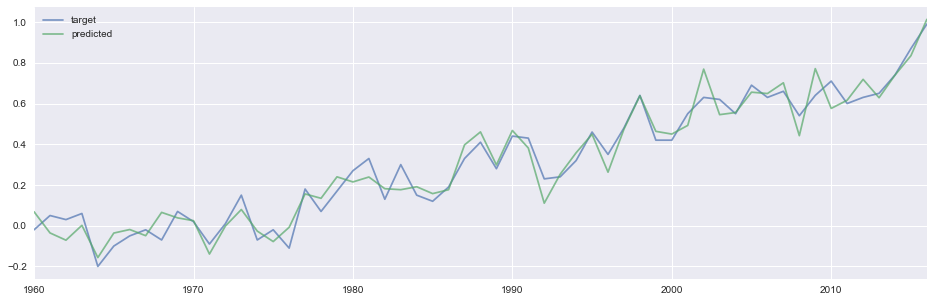

In [190]:
dataset_tempe[['target', 'predicted']].plot(figsize = (16,5), alpha=0.7);

## Analysis of the parameter of the model

In [191]:
X_tempe_train.columns

Index(['Mortality rate, under-5 (per 1,000 live births)',
       'Population growth (annual %)',
       'Improved water source, urban (% of urban population with access)',
       'Access to electricity (% of population)',
       'Electricity production from nuclear sources (% of total)',
       'Average precipitation in depth (mm per year)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from coal sources (% of total)',
       'Nitrous oxide emissions (% change from 1990)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)',
       'CO2 emissions (kg per PPP $ of GDP)',
       'Electric power consumption (kWh per capita)',
       'Methane emissions (% change from 1990)',
       'Marine protected areas (% of territorial waters)',
       'Energy use (kg of oil equivalent per capita)',
       'CO2 emissions (kg per 2010 US$ of GDP)',


In [192]:
params_tempe = pd.Series(LR_tempe.coef_, index=X_tempe_train.columns)
params_tempe

Mortality rate, under-5 (per 1,000 live births)                                              1.740679e-02
Population growth (annual %)                                                                 1.665529e+00
Improved water source, urban (% of urban population with access)                             1.269675e+01
Access to electricity (% of population)                                                      5.768689e-01
Electricity production from nuclear sources (% of total)                                    -1.181816e+00
Average precipitation in depth (mm per year)                                                -2.366261e-02
Electricity production from hydroelectric sources (% of total)                              -1.070114e+00
Electricity production from coal sources (% of total)                                       -1.160909e+00
Nitrous oxide emissions (% change from 1990)                                                 7.126137e-04
Annual freshwater withdrawals, total (% of int

In [193]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([LR_tempe.fit(*resample(X_tempe_train, y_tempe_train)).coef_ for i in range(1000)], 0)

In [194]:
params_tempe.nlargest(5)

CO2 emissions (kg per 2011 PPP $ of GDP)                                72.228573
Improved water source, urban (% of urban population with access)        12.696748
Population growth (annual %)                                             1.665529
Renewable energy consumption (% of total final energy consumption)       1.253294
Terrestrial and marine protected areas (% of total territorial area)     0.948325
dtype: float64

In [195]:
params_tempe.nsmallest(5)

CO2 emissions (kg per PPP $ of GDP)                        -117.299285
Improved water source (% of population with access)         -13.208508
Terrestrial protected areas (% of total land area)           -2.091446
Urban population growth (annual %)                           -1.197769
Electricity production from nuclear sources (% of total)     -1.181816
dtype: float64

In [560]:
# from dataframe
n = 5
params_tempe.nlargest(n)
for i in range(1,n+1):
    index = params_tempe.nlargest(n).index[i-1]
    print(i,df_ccpi_clean_reset.loc[index][0],'\t',df_ccpi_clean_reset.loc[index][2])
    
# from dataframe
n = 5
params_tempe.nsmallest(n)
for i in range(1,n+1):
    index = params_tempe.nsmallest(n).index[i-1]
    print(i,df_ccpi_clean_reset.loc[index][0],'\t',df_ccpi_clean_reset.loc[index][2])

KeyError: 'the label [Terrestrial protected areas (% of total land area)] is not in the [index]'

In [196]:
# df_param_err = pd.DataFrame({'effect': (params_tempe*100).round(0), 'error': (err*100).round(0)})
df_param_err = pd.DataFrame({'effect': (params_tempe*100), 'error': (err*100)})
df_param_err

,effect,error
"Mortality rate, under-5 (per 1,000 live births)",1.740679e+00,3.287173e+01
Population growth (annual %),1.665529e+02,4.956356e+02
"Improved water source, urban (% of urban population with access)",1.269675e+03,1.384071e+03
Access to electricity (% of population),5.768689e+01,7.303882e+02
Electricity production from nuclear sources (% of total),-1.181816e+02,3.371986e+02
Average precipitation in depth (mm per year),-2.366261e+00,3.948489e+01
Electricity production from hydroelectric sources (% of total),-1.070114e+02,3.433327e+02
Electricity production from coal sources (% of total),-1.160909e+02,3.572167e+02
Nitrous oxide emissions (% change from 1990),7.126137e-02,3.674643e+01
"Annual freshwater withdrawals, total (% of internal resources)",-5.204810e+00,1.897917e+02


In [197]:
print(df_param_err['error'].argmax(), df_param_err['error'].max())
print(df_param_err['error'].argmin(), df_param_err['error'].min())

Improved water source (% of population with access) 1550.79306253
Electricity production from renewable sources, excluding hydroelectric (kWh) 2.17487357441e-09


# Additional Learning (?)

## RANDOM FOREST REGRESSION

In [567]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
#from sklearn.grid_search import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
import seaborn as sns; sns.set()

Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(X_tempe_train, y_tempe_train, random_state=0, test_size=0.75)

In [583]:
max_depth = 30

regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_tempe_train, y_tempe_train)

# Predict on new data
y_rf = regr_rf.predict(X_tempe_train)
y_rf

array([ 0.018,  0.011, -0.012, -0.019, -0.028, -0.038, -0.043, -0.038,
       -0.027, -0.021,  0.003,  0.002, -0.001, -0.005,  0.002,  0.02 ,
        0.036,  0.071,  0.12 ,  0.153,  0.19 ,  0.207,  0.211,  0.211,
        0.211,  0.219,  0.236,  0.28 ,  0.304,  0.334,  0.334,  0.34 ,
        0.34 ,  0.342,  0.348,  0.368,  0.392,  0.451,  0.466,  0.487,
        0.515,  0.53 ,  0.554,  0.601,  0.614,  0.619,  0.622,  0.632,
        0.629,  0.63 ,  0.63 ,  0.65 ,  0.709,  0.759,  0.803,  0.856,
        0.88 ])

In [584]:
dataset_tempe['predicted_rf'] = y_rf
dataset_tempe.head()

,Methane emissions (% change from 1990),Improved water source (% of population with access),Energy use (kg of oil equivalent per capita),Average precipitation in depth (mm per year),Renewable electricity output (% of total electricity output),"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Improved water source, urban (% of urban population with access)",Renewable energy consumption (% of total final energy consumption),Arable land (% of land area),Electricity production from natural gas sources (% of total),...,HFC gas emissions (thousand metric tons of CO2 equivalent),PFC gas emissions (thousand metric tons of CO2 equivalent),CO2 emissions (kt),Agricultural land (sq. km),"Population, total",Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),target,predicted,predicted_rf
1960,1.38551,94.5607,2166.84,938.714,21.8154,182.64,98.1536,13.6539,23.1082,7.02329,...,74836.7,104428,1.0667e+07,3.02061e+07,2.40932e+09,1.59218e+06,4.02171e+06,0.03,0.029348,0.018
1961,1.38551,94.5607,2182.47,938.714,21.8154,182.64,98.1536,13.6539,23.1082,7.07026,...,74836.7,104428,1.05744e+07,3.02061e+07,2.4345e+09,1.59218e+06,4.02171e+06,0.02,0.008862,0.011
1962,1.38551,94.5607,2225.03,938.714,21.8154,182.64,98.1536,13.6539,23.0374,7.09025,...,74836.7,104428,1.07329e+07,3.02598e+07,2.47101e+09,1.59218e+06,4.02171e+06,-0.01,-0.004089,-0.012
1963,1.38551,94.5607,2283.57,938.714,21.8154,182.64,98.1536,13.6539,22.9832,7.07608,...,74836.7,104428,1.10637e+07,3.03205e+07,2.51917e+09,1.59218e+06,4.02171e+06,-0.02,-0.013264,-0.019
1964,1.38551,94.5607,2332.27,938.714,21.8154,182.64,98.1536,13.6539,22.902,7.0471,...,74836.7,104428,1.13906e+07,3.03669e+07,2.5672e+09,1.59218e+06,4.02171e+06,-0.03,-0.027105,-0.028


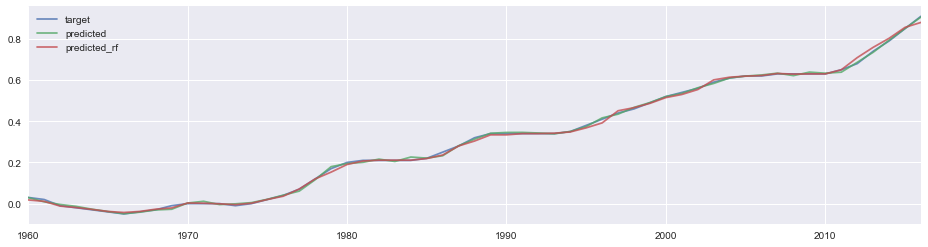

In [595]:
dataset_tempe[['target', 'predicted', 'predicted_rf']].plot(figsize = (16,4), alpha=0.8);

## Analysis of the parameter of the model

In [592]:
regr_rf.__dict__

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
 'base_estimator_': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
 'bootstrap': True,
 'class_weight': None,
 'criterion': 'mse',
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_split',
  'random_state'),
 'estimators_': [DecisionTreeRegressor(criterion='mse', max_depth=30, max_features='auto',
             max

In [556]:
params_tempe = pd.Series(regr_rf.coef_, index=X_tempe_train.columns)
params_tempe

Methane emissions (% change from 1990)                                                       5.501475e-03
Improved water source (% of population with access)                                         -1.212991e+00
Energy use (kg of oil equivalent per capita)                                                 9.334947e-05
Average precipitation in depth (mm per year)                                                -2.415037e-04
Renewable electricity output (% of total electricity output)                                 1.517577e-02
Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)                         1.094450e-02
Improved water source, urban (% of urban population with access)                             5.641723e-01
Renewable energy consumption (% of total final energy consumption)                           9.343328e-02
Arable land (% of land area)                                                                -3.732563e-02
Electricity production from natural gas source

In [557]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([LR_tempe.fit(*resample(X_tempe_train, y_tempe_train)).coef_ for i in range(1000)], 0)

In [558]:
params_tempe.nlargest(5)

Terrestrial protected areas (% of total land area)                    2.424278
Improved water source, urban (% of urban population with access)      0.564172
CO2 emissions (kg per 2010 US$ of GDP)                                0.488936
Population growth (annual %)                                          0.266776
Renewable energy consumption (% of total final energy consumption)    0.093433
dtype: float64

In [559]:
params_tempe.nsmallest(5)

CO2 emissions (kg per 2011 PPP $ of GDP)                               -5.479349
Terrestrial and marine protected areas (% of total territorial area)   -1.322365
Improved water source (% of population with access)                    -1.212991
Marine protected areas (% of territorial waters)                       -0.844283
CO2 emissions (kg per PPP $ of GDP)                                    -0.664407
dtype: float64

In [562]:
# df_param_err = pd.DataFrame({'effect': (params_tempe*100).round(0), 'error': (err*100).round(0)})
df_param_err = pd.DataFrame({'effect': (params_tempe*100), 'error': (err*100)})
df_param_err

,effect,error
Methane emissions (% change from 1990),5.501475e-01,4.700047e+00
Improved water source (% of population with access),-1.212991e+02,2.423450e+02
Energy use (kg of oil equivalent per capita),9.334947e-03,1.957014e-01
Average precipitation in depth (mm per year),-2.415037e-02,6.173397e+00
Renewable electricity output (% of total electricity output),1.517577e+00,2.472763e+01
"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)",1.094450e+00,5.324310e+00
"Improved water source, urban (% of urban population with access)",5.641723e+01,1.816831e+02
Renewable energy consumption (% of total final energy consumption),9.343328e+00,8.354701e+01
Arable land (% of land area),-3.732563e+00,2.466077e+01
Electricity production from natural gas sources (% of total),8.495023e+00,4.425430e+01


In [563]:
print(df_param_err['error'].argmax(), df_param_err['error'].max())
print(df_param_err['error'].argmin(), df_param_err['error'].min())

Improved water source (% of population with access) 242.345015543
Electricity production from renewable sources, excluding hydroelectric (kWh) 3.6947851252e-10


## PCA

In [274]:
from sklearn.decomposition import PCA

pca = PCA().fit(Xtrain)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.xlim(0,5)

NameError: name 'Xtrain' is not defined

In [ ]:
from sklearn.decomposition import RandomizedPCA

Rpca = PCA(svd_solver='randomized').fit(Xtrain)
plt.plot(np.cumsum(Rpca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.xlim(0,5)


In [ ]:
pca = PCA(2)
Rpca = PCA(4, svd_solver='randomized')
projected = Rpca.fit_transform(Xtrain)
print(Xtrain.shape)
print(projected.shape)

In [ ]:
Xtrain = projected

In [ ]:
ytrain.head()

In [ ]:
ytrain_color = country_class_y['Label'].map({'Good':2, 'Neutral':1, 'Bad':0})

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
c= ytrain_color, edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('spectral', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
X_new = pca.inverse_transform(projected)
X_new.shape

In [ ]:
(X_new > 324000).all(axis = 0).sum()

In [ ]:
22, 532

In [ ]:
X_new.shape
56*557/(X_new > 1000000).sum()
Xtrain.shape

#  RF

In [ ]:
Xtrain.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import seaborn as sns; sns.set()

from sklearn.grid_search import GridSearchCV

Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xtrain, ytrain, random_state=0, test_size=0.75)
RF = RandomForestClassifier(random_state=0)


In [ ]:
RF.get_params().keys()

In [ ]:
param_grid_rf = {'n_estimators': [1, 10, 100, 1000, 2000, 5000]}
grid_rf = GridSearchCV(RF, param_grid_rf)


In [ ]:
%time grid_rf.fit(Xtrain, ytrain)
print(grid_rf.best_params_)

In [ ]:
RF = grid_rf.best_estimator_


In [ ]:
RF.fit(Xrf_train, yrf_train)
yrf_pred = RF.predict(Xrf_test)


In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(yrf_test, yrf_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn import metrics
print(metrics.classification_report(yrf_pred, yrf_test))

In [ ]:
from sklearn.cross_validation import cross_val_score
cross_val_score(RF, Xtrain, ytrain, cv=4).mean()

After doing Recrusive Feature Elimination on our dataset, indicators which has most significant contribution to global temperature anomaly can be discovered. We found top seven indicators, which are:

* **Nitrous oxide emissions (thousand metric tons of CO<sub>2</sub> equivalent)**
<dd> While it contributes only 5 percent of US greenhouse gas emission in 2015. But according to EPA, the impact of 1 pound of N<sub>2</sub>O on warming the atmosphere is almost 300 times that of 1 pound of carbon dioxide [1]. </dd>


* **Methane emissions (kt of CO<sub>2</sub> equivalent)**
<dd> Pound for pound, the comparative impact of CH<sub>4</sub> is more than 25 times greater than CO<sub>2</sub> over a 100-year period [1]. Though it only contributes only 10 percent of US greenhouse gas emission in 2015.</dd>


* **Forest area (sq. km)**
<dd> As described by plot ..... , the trend of forest area in the world is decreasing. It means that deforestation keeps happening around the world. In accordance with World Carfree Network (WCN) [3], deforestation contributes to 15 percent of global carbon dioxide emissions</dd>


* **Agricultural land (sq. km)**
<dd> Agriculture actually contributes to climate change. At every stage of agricultural process, some greenhouse gases are released into atmosphere. For example, Nitrous Oxide is emitted when people use synthetic fertilizers to the soil or domestic livestock such as cattle also produce a large amount of methane </dd>


* **Other greenhouse gas emissions, HFC, PFC and SF<sub>6</sub> (thousand metric tons of CO<sub>2</sub> equivalent)**
<dd> This group of gases is also called Fluorinated gases. Although, it has only small portion around 3 percent [1]. They are  referred to as High Global Warming Potential gases. One of the reason is their ability to deplete stratospheric ozone substances.</dd>


* **Total greenhouse gas emissions (kt of CO<sub>2</sub> equivalent)**
<dd>As known to many people, execessive greenhouse gas emission is the main cause of global warming and conseqeuntly climate change. This effect is caused due to these gases having greenhouse effect, or trapping heat from sunlight in the atmosphere.  The most abundant greenhouse gases in Earth's atmosphere are water vapor, carbon dioxide, methane, nitrous oxide, ozone, chlorofluorocarbons and Hydrofluorocarbons [2].</dd>


* **CO<sub>2</sub> emissions (kt)**
<dd> Carbon dioxide is the primary greenhouse gas emitted by human activites. The main sources are electricity, transportation and Industry [1]. </dd>


[1] https://www.epa.gov/ghgemissions/overview-greenhouse-gases

[2] https://en.wikipedia.org/wiki/Greenhouse_gas#Global_warming_potential

[3] https://www.scientificamerican.com/article/deforestation-and-global-warming/